number of nodes in the network:  1387
number of edged in the network:  1648
Average degree of the network :  1.18817591925
Density of the network is:  0.00171453956602


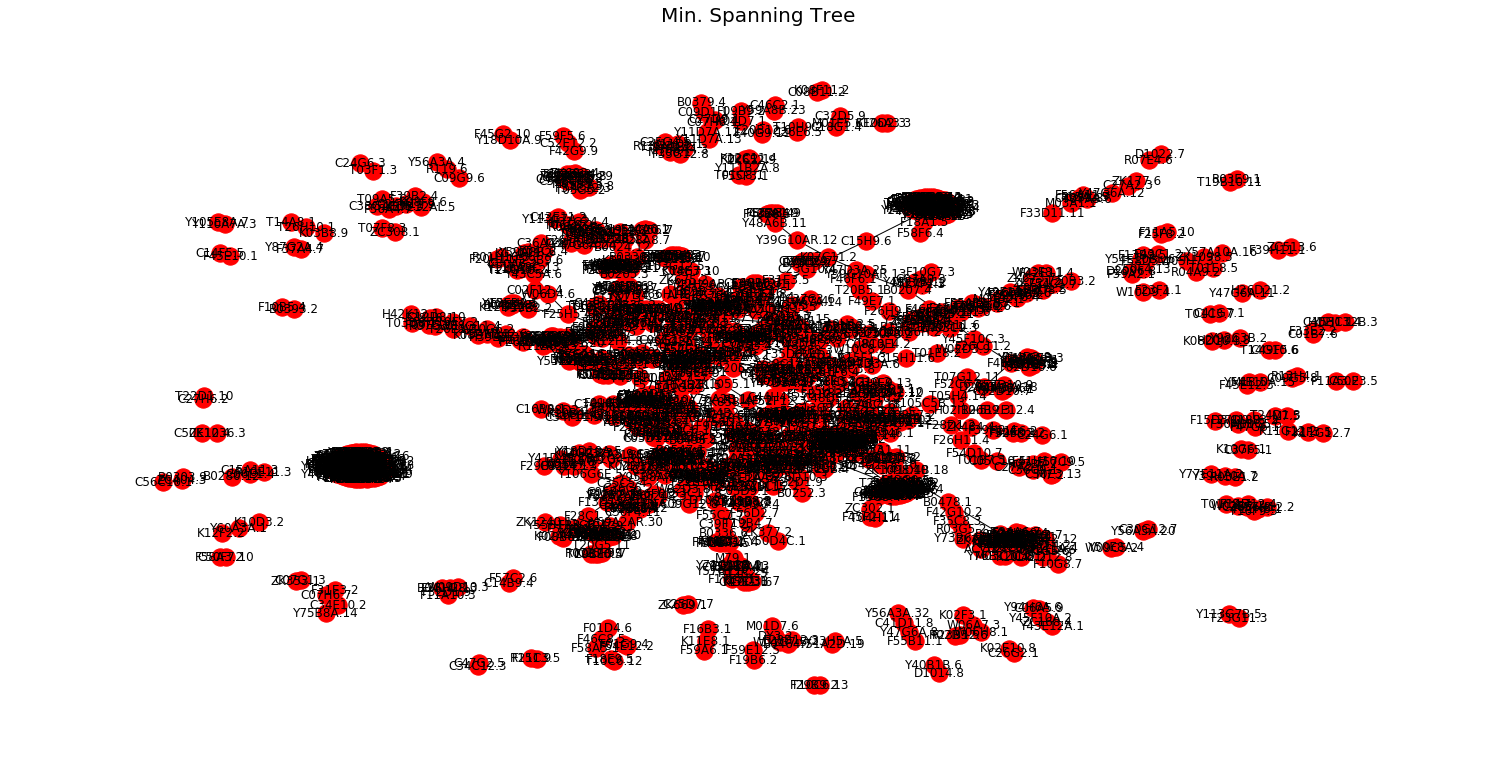

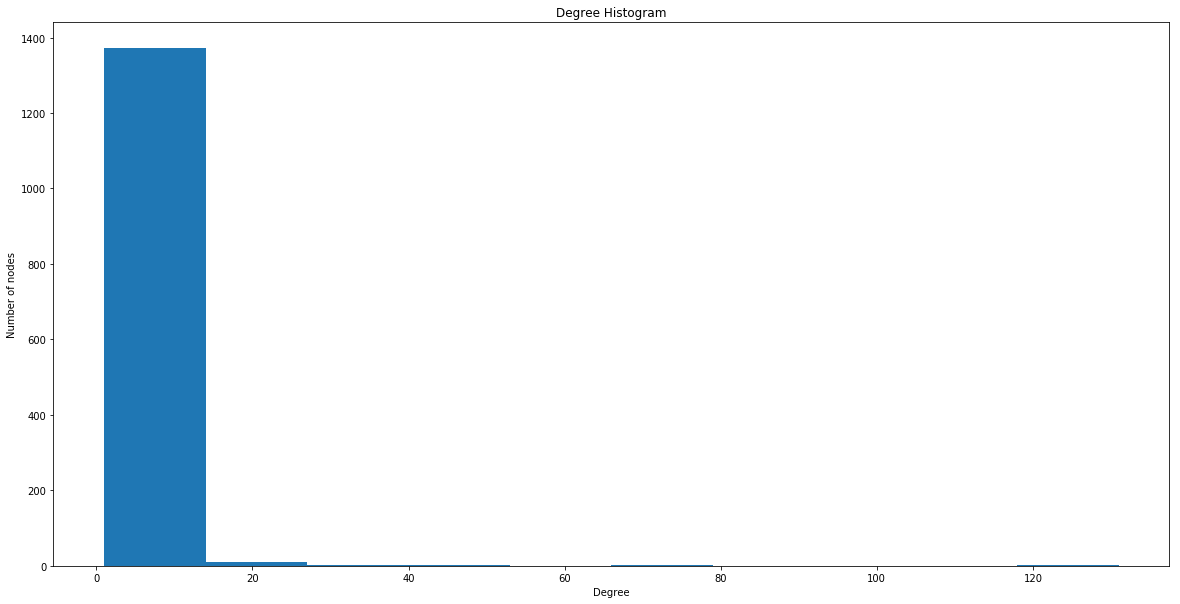

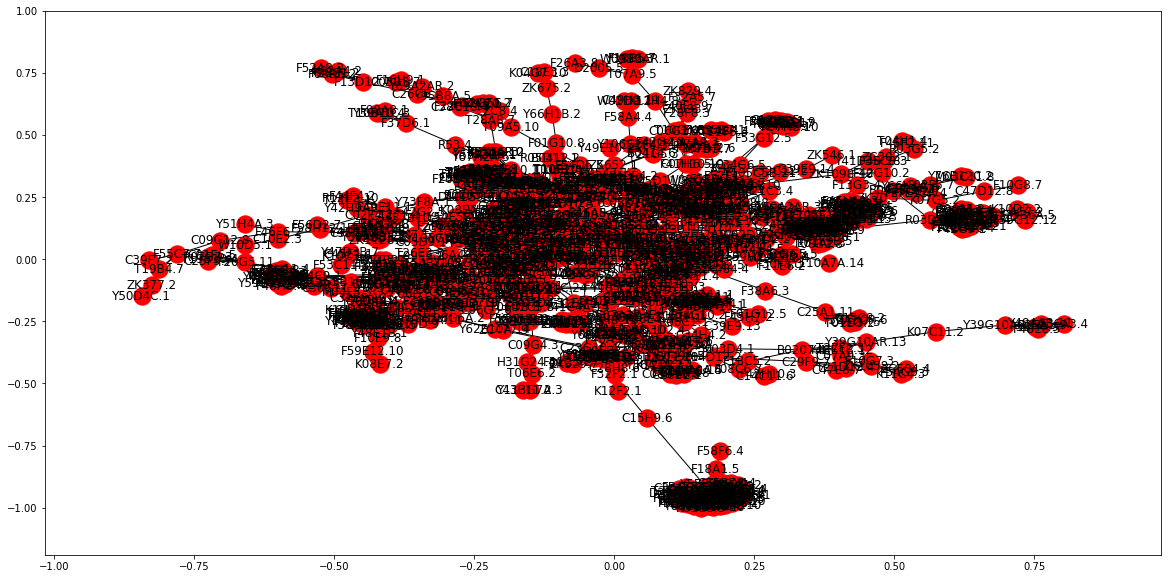

Gc: 22
center: [u'C54D1.6', u'C37A5.9']
clique communities with 3 nodes: 88
protein with biggest effect on the network [(u'T21E12.4', 48)]


In [45]:
# Mini-project-2 
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams

# Data file downloaded from http://www.inetbio.org/wormnet/downloadnetwork.php and removed the last column
edges_txt_file = 'CE-LC-changed.txt'

#building network G with networtx
G = nx.read_edgelist(edges_txt_file, create_using=nx.Graph())

#number of nodes, edges and avg. degree of the network
num_nodes = len(G)
print 'number of nodes in the network: ', num_nodes

num_edges = G.number_of_edges()
print 'number of edged in the network: ', num_edges

avg_degree = float(num_edges)/num_nodes
print 'Average degree of the network : ', avg_degree

#density of the network
density = num_edges*2.0/float(num_nodes*(num_nodes-1))
print 'Density of the network is: ', density

#minimum spanning tree in G
min_span_tree = nx.minimum_spanning_tree(G, weight='difference')
nx.draw(min_span_tree, with_labels=True)
plt.title("Min. Spanning Tree", fontsize = 20)
plt.show()

#Draw the degree distribution histogram.
degree_distribution = G.degree()
degree_seq = sorted([d for n, d in degree_distribution], reverse=True)
plt.hist(degree_seq)
plt.title("Degree Histogram")
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.show()

#Find the largest connected component of the network  (LC) and answer the following questions about LC
LC = max(nx.connected_component_subgraphs(G), key=len)

#Draw LC.
rcParams['figure.figsize'] = 20,10
nx.draw_networkx(LC)
plt.show()

#What is its diameter?
print 'Gc:', nx.diameter(LC)

#What is the center of LC?
print 'center:', (nx.center(LC))

#What is the number of clique communities with 3 nodes?
def clique_with_nodes(num, LC):
    assert isinstance(num, int)
    assert num==3
    return[x for x in list(nx.find_cliques(Gc)) if len(x) == num]
    
print 'clique communities with 3 nodes:', len(clique_with_nodes(3, LC))

#What is the name of the protein that changing its status has potentially the biggest effect on the rest of the network?
pagerank = nx.pagerank_scipy(LC)
sorted_pr = sorted(pagerank.iteritems(), reverse=True, key=lambda(k,v):v)
print 'protein with biggest effect on the network', LC.degree(sorted_pr[2])
